# Visualisation with Plotly

`plotly.py` is an another open-source library that is used to create visualisations in Python. `plotly` is unique in the way that it enables interactive visualisations.   
   
`plotly` is a high-level, declarative charting library, built on top of plotly.js. `plotly` ships with over 30 plot types, including scientific charts, 3D graphs, statistical charts, SVG maps, and more.   

In the following section on plotly, we will learn how to create:
- bar charts;
- scatter plots;
- scatter matrix;
- treemap charts;
- histogram charts; and 
- tile maps.

`Plotly Express` is a high-level wrapper for Plotly that enables you to do many of the things possible with `Plotly`, but with a simpler syntax. Once `Plotly Express` is imported (usually as `px`), most plots are made with just one function call that accepts a pandas dataframe, and a simple description of the plot you want to make.

In [25]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt

## Dataset

The `perth_house_prices.csv` dataset was obtained from [Kaggle](https://www.kaggle.com/syuzai/perth-house-prices) and includes data from 322 Perth suburbs, resulting in an average of about 100 rows per suburb.

The data contains the following columns:

In [26]:
#read perth house prices data from csv
house_prices = pd.read_csv('perth_house_prices.csv')

In [27]:
house_prices.columns

Index(['ADDRESS', 'SUBURB', 'PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE',
       'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN',
       'NEAREST_STN_DIST', 'DATE_SOLD', 'POSTCODE', 'LATITUDE', 'LONGITUDE',
       'NEAREST_SCH', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK'],
      dtype='object')

## Plotly

In [28]:
#import plotly express
import plotly.express as px

In [29]:
# examine the top 5 rows of the data
house_prices.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


In [30]:
# Filter data where suburb is 'Bentley'
bentley_house_prices = house_prices.query("SUBURB == 'Bentley'")

In [31]:
# Group the bentley house prices by 'BEDROOMS' and 'BATHROOMS` and then calculate the mean price for each group.
bentley_house_prices_groupby = bentley_house_prices.groupby(['BEDROOMS', 'BATHROOMS'])['PRICE'].mean().reset_index()

In [32]:
#print the first 5 rows
bentley_house_prices_groupby.head()

,BEDROOMS,BATHROOMS,PRICE
0,2,1,301166.666667
1,3,1,393912.500000
2,3,2,447488.888889
3,4,1,420000.000000
4,4,2,469671.052632


The `px.bar()` functions creates bar charts. In the following example, we plot the number of bedrooms on the x-axis and the average price on the y-axis. The `color` parameter determines which column in the dataframe should be used for colour encoding. In the following example, the `BATHROOMS` columns is used.  
   
Plotly is interactive so it allows you to click on the elements of the chart for more info, zoom in and out, and focus on specific part of the chart.

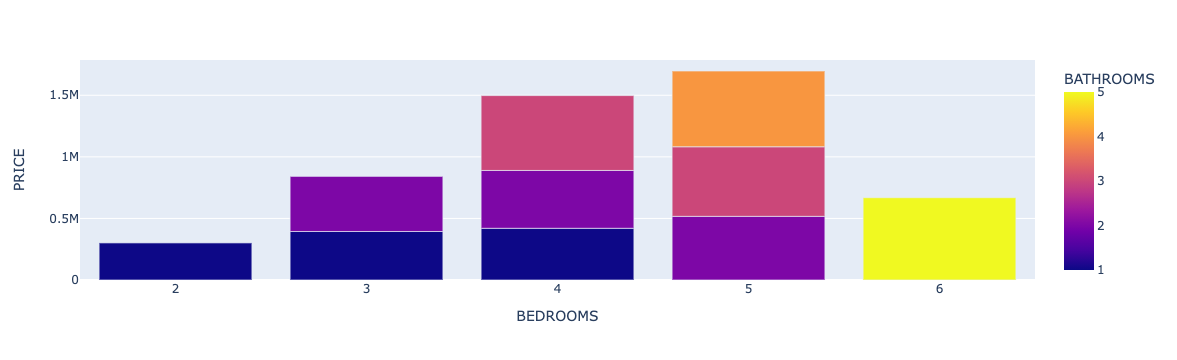

In [33]:
fig = px.bar(bentley_house_prices_groupby, x="BEDROOMS", y="PRICE", color="BATHROOMS")
fig.show()

## Scatter Plot

The `px.scatter` function, plots each data point in the dataframe as a marker point, whose location is given by the x and y columns. In the following example, we plot the `BEDROOMS` column against the `PRICE` column. The number of bathrooms is produced with different colors.   
   
Plotly Express also allows you to add Ordinary Least Squares regression trendline to scatterplots with the `trendline` argument.

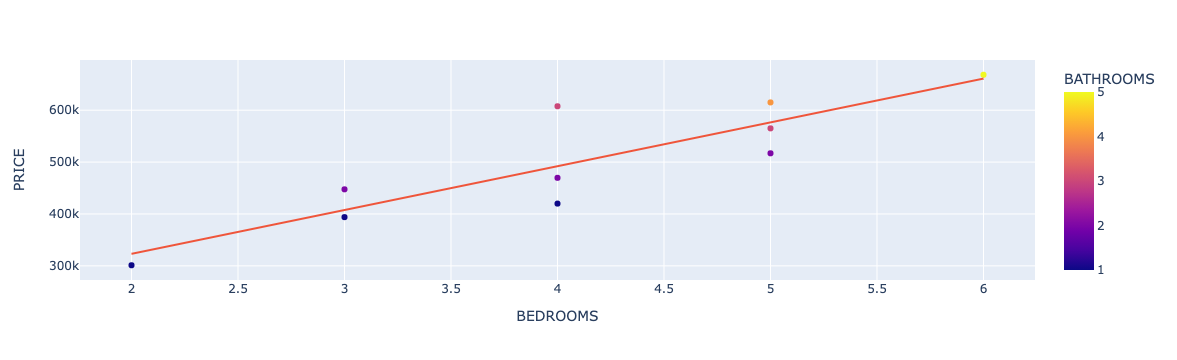

In [34]:
fig = px.scatter(bentley_house_prices_groupby, x="BEDROOMS", y="PRICE", color="BATHROOMS", trendline="ols")
fig.show()

Scatter plots with variable-sized circular markers are known as bubble charts. In the following example, we increase the marker size to `40`, and use the `hover_data` argument to add the 'PRICE' data to show on hover. You can add other columns of the dataframe to hover data with the `hover_data` argument.

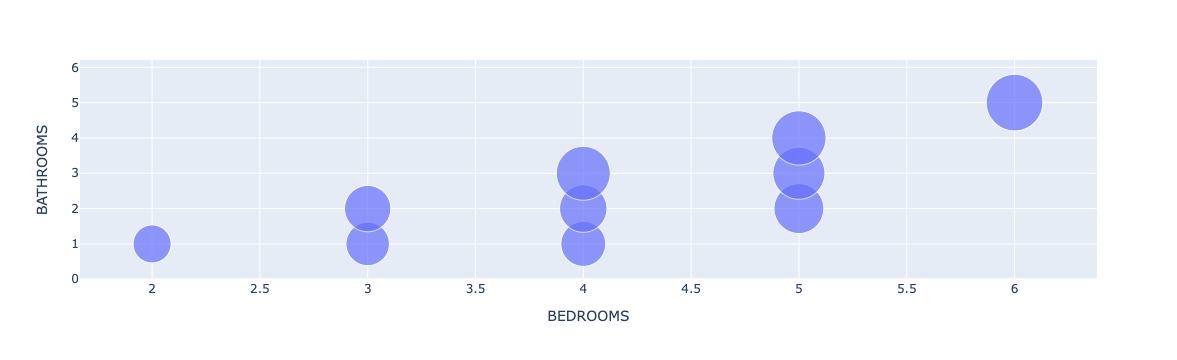

In [35]:
fig = px.scatter(bentley_house_prices_groupby, x="BEDROOMS", y="BATHROOMS", size="PRICE", size_max=40, hover_data=['PRICE'])
fig.show()

## Scatter Matrix

The `px.scatter_matrix` function can used to plot the scatter matrix for the columns of the dataframe. By default, all columns are considered.

In [36]:
#Group all houses in 'Bentley' by 'BEDROOMS' and 'BATHROOMS', and calculate the median for each group.
bentley_house_prices_groupby = house_prices.query("SUBURB == 'Bentley'").groupby(['BEDROOMS', 'BATHROOMS']).median().reset_index()

#print the first 5 rows
bentley_house_prices_groupby.head()

,BEDROOMS,BATHROOMS,PRICE,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,2,1,270000.0,1.0,1529.5,71.0,1964.0,8550.0,1250.0,6102.0,-32.006473,115.921666,1.819364,42.0
1,3,1,385125.0,1.0,510.5,100.0,1984.0,8400.0,1600.0,6102.0,-32.008501,115.917991,1.774798,42.0
2,3,2,467500.0,2.0,296.0,115.0,2002.0,8400.0,1500.0,6102.0,-32.007862,115.920226,1.766369,42.0
3,4,1,420000.0,1.0,938.0,132.0,1960.0,7800.0,2600.0,6102.0,-32.011445,115.903936,0.680814,NaN
4,4,2,445000.0,2.0,352.0,147.0,1997.0,8500.0,1700.0,6102.0,-32.010060,115.919180,1.827635,42.0


In the following example, we plot the scatter matrix for the "BUILD_YEAR", "PRICE", and "NEAREST_STN_DIST" columns, using the `dimensions` argument.   
   
We use the `hover_data` argument to add the 'PRICE', 'BEDROOMS', and 'BATHROOMS' data to show on hover.

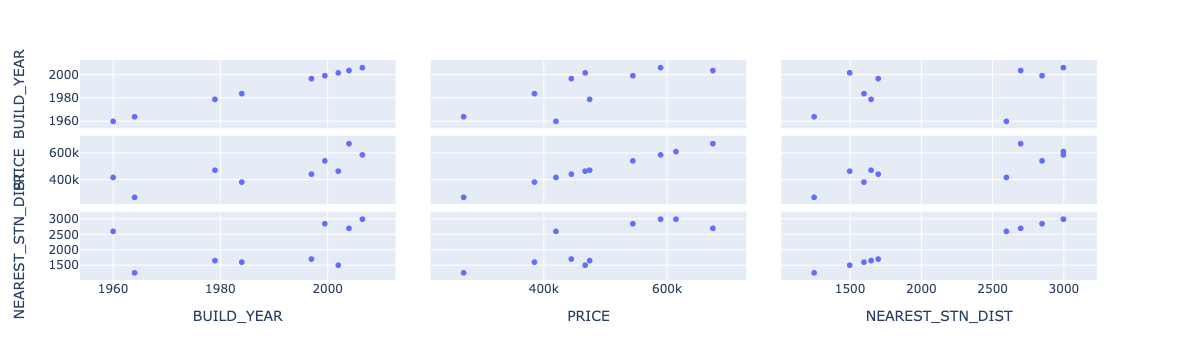

In [37]:
fig = px.scatter_matrix(bentley_house_prices_groupby, dimensions=["BUILD_YEAR", "PRICE", "NEAREST_STN_DIST"], hover_data=['PRICE', 'BEDROOMS', 'BATHROOMS'])
fig.show()

## Treemap Charts

Treemap charts visualise hierarchical data using nested rectangles. Click on a rectangle to zoom in/out. The chart also displays a pathbar in the upper-left corner of your treemap. To zoom out you can use the path bar as well.

In the following example, we group the house prices data by suburb, number of bedrooms, and number of bathrooms, and then calculate median of each group.

In [38]:
groupby_suburb_bedrooms_bathrooms_mdn = house_prices.groupby(['SUBURB', 'BEDROOMS', 'BATHROOMS']).median().reset_index()

In [39]:
#print the first 5 rows
groupby_suburb_bedrooms_bathrooms_mdn.head()

,SUBURB,BEDROOMS,BATHROOMS,PRICE,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,Alexander Heights,2,1,300000.0,2.0,457.0,84.0,1982.0,13500.0,7600.0,6064.0,-31.832046,115.875426,2.211711,133.0
1,Alexander Heights,3,1,370000.0,2.0,684.0,113.0,1990.0,13500.0,6700.0,6064.0,-31.830621,115.865900,1.952993,46.0
2,Alexander Heights,3,2,410000.0,2.0,639.0,143.0,1991.0,13700.0,7200.0,6064.0,-31.829340,115.868570,2.086452,46.0
3,Alexander Heights,4,1,410000.0,1.0,687.0,135.0,1992.0,13400.0,6600.0,6064.0,-31.832010,115.864110,1.758992,46.0
4,Alexander Heights,4,2,459000.0,2.0,594.5,168.5,1997.0,14300.0,7250.0,6064.0,-31.824205,115.862825,1.907060,75.0


The `px.treemap` method plots a treemap chart, where each row of the DataFrame is represented as a sector/rectangle of the treemap. In this example, the `path` argument is used to represent data in the following hierarchical order: suburb -> number of bedrooms -> number of bathrooms.

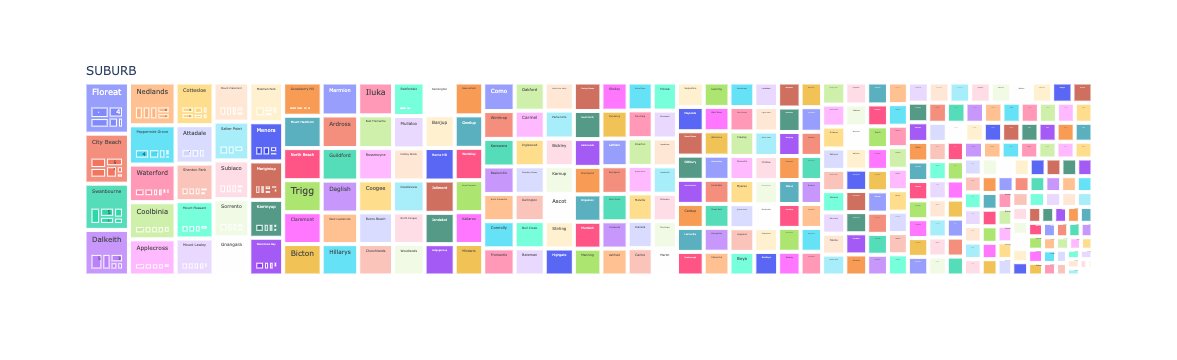

In [40]:
fig = px.treemap(groupby_suburb_bedrooms_bathrooms_mdn, 
                 path=[px.Constant('SUBURB'), 'SUBURB', 'BEDROOMS', 'BATHROOMS'], values='PRICE')
fig.show()

## Histogram Charts

In Plotly a histogram is an aggregated bar chart.   
   
In the following example, we filter the rows where suburb equals to 'City Beach' and 'Nedlands'.

In [41]:
citybeach_nedlands_house_prices = house_prices.query("SUBURB == 'City Beach' | SUBURB == 'Nedlands'")

#print first 5 rows
citybeach_nedlands_house_prices.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
185,1 Gali Lane,City Beach,1930000,4,3,2.0,440,307,2012.0,8800,Swanbourne Station,6000,04-2016\r,6015,-31.929048,115.770024,NEWMAN COLLEGE,1.760862,44.0
291,1 Kinkuna Way,City Beach,1645000,5,4,2.0,778,333,1974.0,10000,Glendalough Station,5600,09-2016\r,6015,-31.913820,115.763360,HALE SCHOOL,1.935452,6.0
303,1 Langham Street,Nedlands,1200000,4,2,4.0,540,213,2012.0,5400,Shen,1500,04-2019\r,6009,-31.973063,115.806707,SHENTON COLLEGE,1.526827,14.0
362,1 Merley Crescent,City Beach,1720000,4,2,2.0,840,251,NaN,9000,Swanbourne Station,6500,07-2019\r,6015,-31.924451,115.769612,NEWMAN COLLEGE,1.680827,44.0
495,1 Simon Place,City Beach,1450000,3,1,NaN,993,200,1968.0,9500,Grant Street Station,7000,11-2019\r,6015,-31.923760,115.764500,NEWMAN COLLEGE,2.158594,44.0


We then group the citybeach and nedlands house data by 'SUBURB', 'BEDROOMS', and 'BATHROOMS'. And then we count the number of houses in each group.

In [42]:
citybeach_nedlands_groupby_count = citybeach_nedlands_house_prices.groupby(['SUBURB', 'BEDROOMS', 'BATHROOMS'])['PRICE'].count().reset_index()

In [43]:
#print first 5 rows
citybeach_nedlands_groupby_count.head()

,SUBURB,BEDROOMS,BATHROOMS,PRICE
0,City Beach,1,1,2
1,City Beach,2,2,2
2,City Beach,3,1,12
3,City Beach,3,2,15
4,City Beach,3,3,4


The `px.histogram` function is used to create histogram charts. The `marginal` parameter is used to draw marginal distribution plots which are small subplots above the main plot that show the distribution of data along only one dimension. The `color` parameter draws each suburb in a different color.

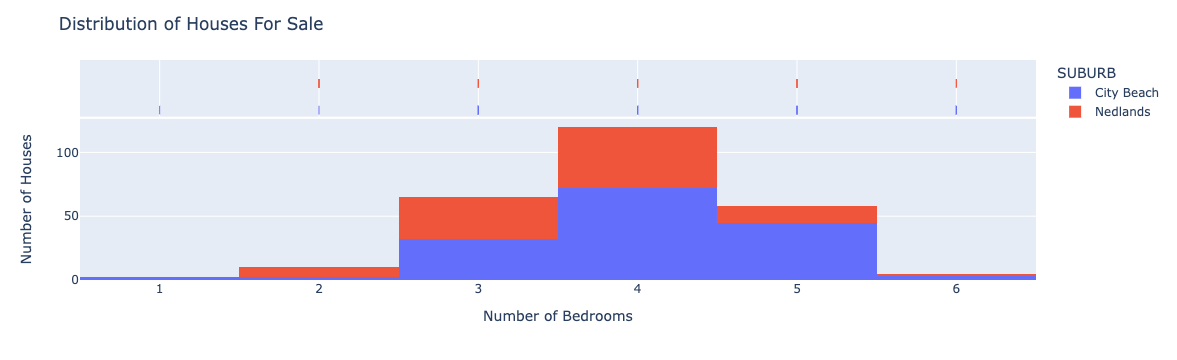

In [44]:
fig = px.histogram(citybeach_nedlands_groupby_count, x="BEDROOMS", y="PRICE", marginal="rug",color="SUBURB")
fig.update_layout(
    title="Distribution of Houses For Sale",
    xaxis_title="Number of Bedrooms",
    yaxis_title="Number of Houses",
)

fig.show()


## Scatter Plot on Mapbox

Plotly also allows to plot on [Mapbox](https://studio.mapbox.com/) maps.   
   
The `px.scatter_mapbox` function is used to plot a scatter plot on a tile map. In the following example, we use the `LATITUDE` and the `LONGITUDE` columns to plot each data point on the map, and categorise different prices using different colors through the `color` parameter. The `color_continuous_scale` specifies the colorscale schema.   
   
   
The `mapbox_style` parameter gives style to the map and determines the overall color scheme of the map. Other options include, "open-street-map", "white-bg", and "dark".

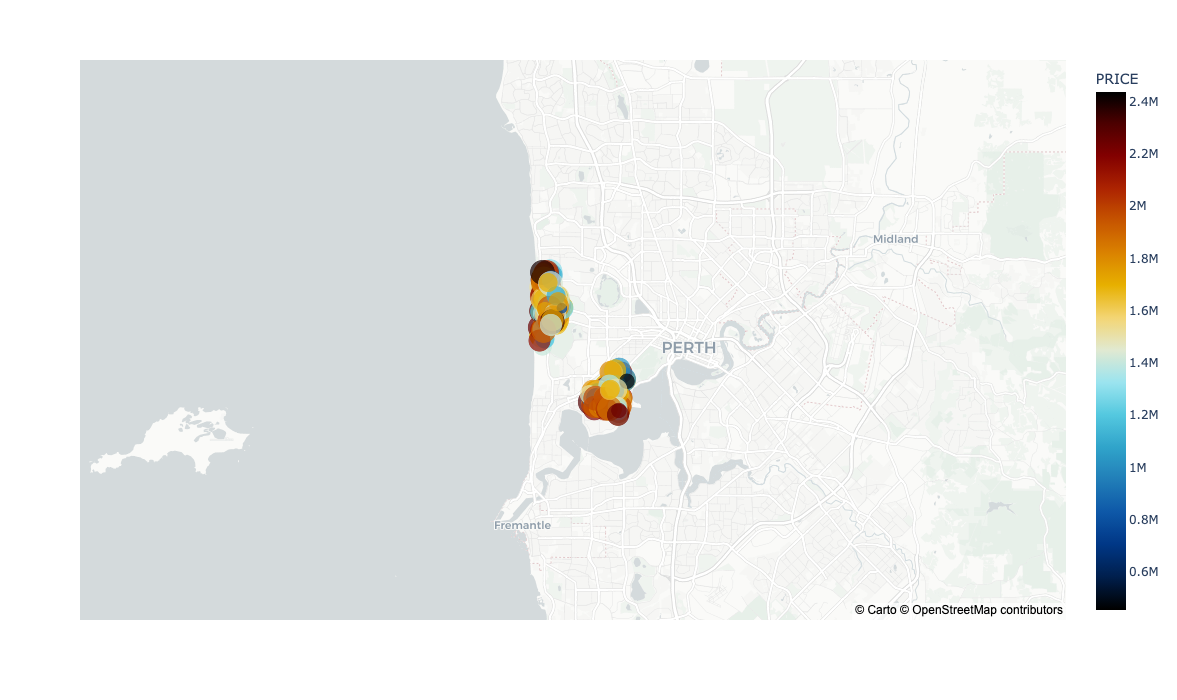

In [45]:
fig = px.scatter_mapbox(citybeach_nedlands_house_prices, lat="LATITUDE", lon="LONGITUDE", color="PRICE", size="BEDROOMS",
                  color_continuous_scale=px.colors.cyclical.IceFire, height=700, zoom=10,
                  mapbox_style="carto-positron")
fig.show()